# 图像特效-旋转模糊

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [8]:
def rotation_blur(src,cx,cy,intensity=50):
    srcf = np.float32(src)
    if len(src.shape) < 3:
        srcf = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    rows,cols = srcf.shape[0],srcf.shape[1]
    cx = min(cols - 1,max(0,cx))
    cy = min(rows - 1,max(0,cx))
    for i in range(rows):
        r,g,b=0.,0.,0.
        for j in range(cols):
            temp = math.sqrt((i - cy) ** 2 + (j - cx) ** 2)
            angle = math.atan2(i - cy,j-cx)
            for m in range(intensity):
                angle = angle + 0.005
                nx = int(temp * math.cos(angle) + cx)
                ny = int(temp * math.sin(angle) + cy)
                if nx >= 0 and nx < cols and ny >= 0 and ny < rows:
                    r += srcf[ny,nx,0]
                    g += srcf[ny,nx,1]
                    b += srcf[ny,nx,2]
            r = r / intensity
            g = g / intensity
            b = b / intensity
            
            dst[i,j] = (r,g,b)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

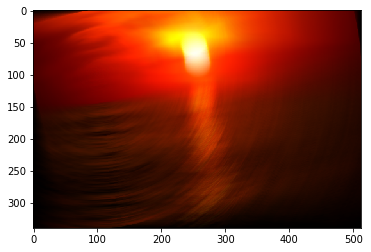

In [9]:
dst = rotation_blur(rgb,100,100)
plt.imshow(dst)